In [1]:
import pandas as pd

In [2]:
us_avg_tuition = pd.read_excel('us_avg_tuition.xlsx')

In [3]:
us_avg_tuition.head()

State      2004-05      2005-06      2006-07     2007-08   \
0     Alabama  5682.838120  5840.549785  5753.496432  6008.168872   
1      Alaska  4328.281362  4632.623449  4918.500619  5069.822132   
2     Arizona  5138.495312  5415.516049  5481.419145  5681.637955   
3    Arkansas  5772.301869  6082.379324  6231.977179  6414.900365   
4  California  5285.921489  5527.881290  5334.825779  5672.472175   

       2008-09      2009-10      2010-11      2011-12       2012-13  \
0  6475.091706  7188.954303  8071.133759  8451.902223   9098.069156   
1  5075.482406  5454.606610  5759.152951  5762.420526   6026.142669   
2  6058.463821  7263.204332  8839.604653  9966.716345  10133.503178   
3  6416.503410  6627.092143  6900.912413  7028.991050   7286.580461   
4  5897.888491  7258.771494  8193.738802  9436.425766   9360.573556   

        2013-14       2014-15       2015-16  
0   9358.928842   9496.084106   9751.101349  
1   6012.444735   6148.808010   6571.340317  
2  10296.199709  10413.843882  10646.278352  
3   7408.495063   7606.410008   7867.296736  
4   9274.193266   9186.824330   9269.844227

In [11]:
us_avg_tuition[us_avg_tuition['State'] == ''].T#.plot()

Empty DataFrame
Columns: []
Index: [State, 2004-05, 2005-06, 2006-07,   2007-08 , 2008-09, 2009-10, 2010-11, 2011-12, 2012-13, 2013-14, 2014-15, 2015-16]

<Axes: >

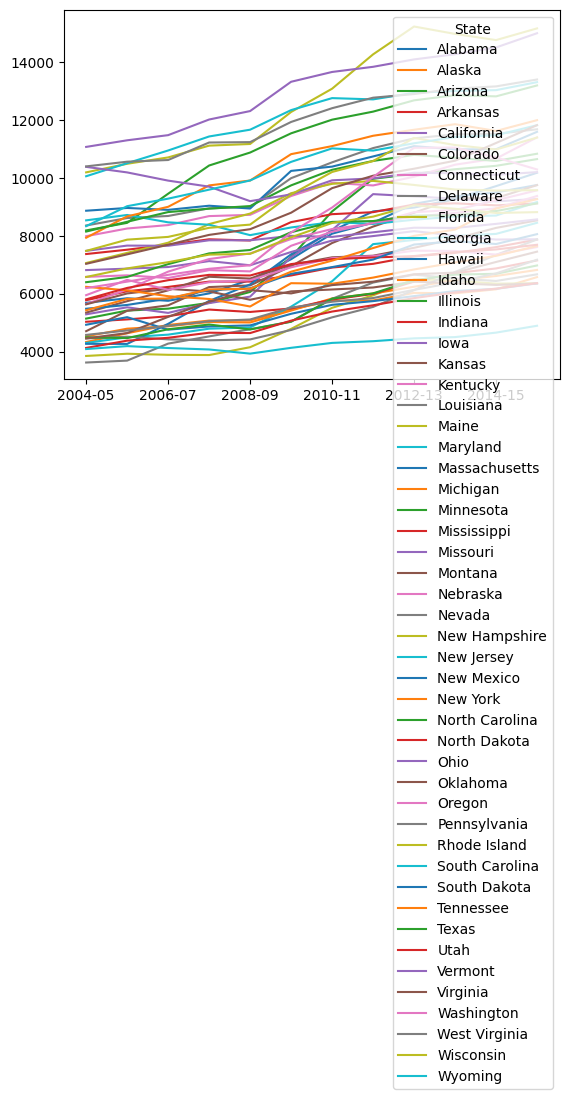

In [28]:
us_avg_tuition.set_index('State').transpose().plot()

In [36]:
import glob
import os

In [43]:
os.listdir(r'./College_Scorecard_Raw_Data_06102024')

['CollegeScorecardDataDictionary.xlsx',
 'Crosswalks',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'FieldOfStudyData1718_1819_PP.csv',
 'FieldOfStudyData1819_1920_PP.csv',
 'FieldOfStudyData1920_2021_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2019_20_PP.csv',
 'MERGED2020_21_PP.csv',
 'MERGED2021_22_PP.csv',
 'MERGED2022_23_PP.csv',
 'Most-Recent-Cohorts-Field-of-Stu

In [50]:
list_of_merged_csv = glob.glob('./College_Scorecard_Raw_Data_06102024/MERGED*.csv')

In [79]:
admission_rates_all = pd.DataFrame()
for csv_file in list_of_merged_csv:
    print(csv_file)
    year = csv_file[44:51].replace('_', '-')
    print(year)
    current_data = pd.read_csv(csv_file, low_memory=False, usecols = ["STABBR", "ADM_RATE"])
    current_data["YEAR"] = year
    admission_rates_all = pd.concat([admission_rates_all, current_data], axis = 0, ignore_index=True)
    current_data = pd.DataFrame()

./College_Scorecard_Raw_Data_06102024\MERGED1996_97_PP.csv
1996-97
./College_Scorecard_Raw_Data_06102024\MERGED1997_98_PP.csv
1997-98
./College_Scorecard_Raw_Data_06102024\MERGED1998_99_PP.csv
1998-99
./College_Scorecard_Raw_Data_06102024\MERGED1999_00_PP.csv
1999-00
./College_Scorecard_Raw_Data_06102024\MERGED2000_01_PP.csv
2000-01
./College_Scorecard_Raw_Data_06102024\MERGED2001_02_PP.csv
2001-02
./College_Scorecard_Raw_Data_06102024\MERGED2002_03_PP.csv
2002-03
./College_Scorecard_Raw_Data_06102024\MERGED2003_04_PP.csv
2003-04
./College_Scorecard_Raw_Data_06102024\MERGED2004_05_PP.csv
2004-05
./College_Scorecard_Raw_Data_06102024\MERGED2005_06_PP.csv
2005-06
./College_Scorecard_Raw_Data_06102024\MERGED2006_07_PP.csv
2006-07
./College_Scorecard_Raw_Data_06102024\MERGED2007_08_PP.csv
2007-08
./College_Scorecard_Raw_Data_06102024\MERGED2008_09_PP.csv
2008-09
./College_Scorecard_Raw_Data_06102024\MERGED2009_10_PP.csv
2009-10
./College_Scorecard_Raw_Data_06102024\MERGED2010_11_PP.csv
201

In [81]:
admission_rates_all.head()#

STABBR  ADM_RATE     YEAR
0     AL       NaN  1996-97
1     AL       NaN  1996-97
2     AL       NaN  1996-97
3     AL       NaN  1996-97
4     AL       NaN  1996-97

In [82]:
admission_rates_all["STABBR"] = admission_rates_all["STABBR"].replace({
    "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut", 
    "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa",
    "KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan",
    "MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire",
    "NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio",
    "OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota",
    "TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia",
    "WI":"Wisconsin","WY":"Wyoming"})

In [83]:
admission_rates_all.head()#

STABBR  ADM_RATE     YEAR
0  Alabama       NaN  1996-97
1  Alabama       NaN  1996-97
2  Alabama       NaN  1996-97
3  Alabama       NaN  1996-97
4  Alabama       NaN  1996-97

In [84]:
state_admission_rate_avg = admission_rates_all.groupby(['YEAR', 'STABBR'])['ADM_RATE'].mean()

In [86]:
state_admission_rate_avg.unstack()

STABBR   AS   Alabama    Alaska   Arizona  Arkansas  California  Colorado  \
YEAR                                                                        
1996-97 NaN       NaN       NaN       NaN       NaN         NaN       NaN   
1997-98 NaN       NaN       NaN       NaN       NaN         NaN       NaN   
1998-99 NaN       NaN       NaN       NaN       NaN         NaN       NaN   
1999-00 NaN       NaN       NaN       NaN       NaN         NaN       NaN   
2000-01 NaN       NaN       NaN       NaN       NaN         NaN       NaN   
2001-02 NaN  0.794096  0.852060  0.786838  0.746689    0.753651  0.792314   
2002-03 NaN  0.757651  0.871700  0.781458  0.776761    0.703294  0.789179   
2003-04 NaN  0.730671  0.805840  0.769627  0.748763    0.764020  0.788326   
2004-05 NaN  0.722556  0.827250  0.758203  0.708670    0.712762  0.771785   
2005-06 NaN  0.710527  0.812775  0.783120  0.750404    0.692042  0.776220   
2006-07 NaN  0.749791  0.804000  0.752617  0.740956    0.702836  0.737015   
2007-08 NaN  0.694485  0.814360  0.778191  0.692585    0.682018  0.738936   
2008-09 NaN  0.667674  0.755225  0.745913  0.739635    0.699072  0.697278   
2009-10 NaN  0.691916  0.610625  0.733552  0.702440    0.698972  0.694812   
2010-11 NaN  0.659031  0.332850  0.726278  0.684077    0.633551  0.687562   
2011-12 NaN  0.694635  0.345750  0.772427  0.681054    0.659398  0.717750   
2012-13 NaN  0.703462  0.603400  0.819295  0.691032    0.692608  0.749260   
2013-14 NaN  0.719052  0.431650  0.820464  0.659673    0.686362  0.743914   
2014-15 NaN  0.708681  0.420700  0.803737  0.705982    0.686032  0.758157   
2015-16 NaN  0.671275  0.578800  0.730617  0.695177    0.631154  0.743267   
2016-17 NaN  0.638853  0.650850  0.676111  0.697232    0.611926  0.721004   
2017-18 NaN  0.679981  0.791450  0.742611  0.720705    0.616593  0.743088   
2018-19 NaN  0.680704  0.762100  0.800665  0.703379    0.622901  0.727415   
2019-20 NaN  0.665948  0.771900  0.772467  0.683980    0.624125  0.735152   
2020-21 NaN  0.748338  0.745025  0.750341  0.701033    0.644071  0.749573   
2021-22 NaN  0.771258  0.715050  0.790600  0.640880    0.657331  0.769479   
2022-23 NaN  0.759019  0.757633  0.836788  0.693389    0.646606  0.787481   

STABBR   Connecticut        DC  Delaware  ...  Tennessee     Texas      Utah  \
YEAR                                      ...                                  
1996-97          NaN       NaN       NaN  ...        NaN       NaN       NaN   
1997-98          NaN       NaN       NaN  ...        NaN       NaN       NaN   
1998-99          NaN       NaN       NaN  ...        NaN       NaN       NaN   
1999-00          NaN       NaN       NaN  ...        NaN       NaN       NaN   
2000-01          NaN       NaN       NaN  ...        NaN       NaN       NaN   
2001-02     0.641588  0.620800  0.667457  ...   0.760913  0.798906  0.858311   
2002-03     0.644857  0.601422  0.645214  ...   0.753731  0.754452  0.886189   
2003-04     0.638651  0.595289  0.649750  ...   0.738540  0.756662  0.846800   
2004-05     0.577385  0.622633  0.633738  ...   0.731878  0.732131  0.816720   
2005-06     0.647868  0.601811  0.655729  ...   0.722458  0.716506  0.882180   
2006-07     0.632168  0.598178  0.683638  ...   0.715782  0.727075  0.836259   
2007-08     0.589320  0.638089  0.634143  ...   0.711078  0.700264  0.791243   
2008-09     0.613515  0.589520  0.684683  ...   0.700105  0.670618  0.801200   
2009-10     0.637139  0.559678  0.652100  ...   0.686551  0.705849  0.762787   
2010-11     0.585823  0.543300  0.589520  ...   0.666452  0.630962  0.761687   
2011-12     0.637610  0.497589  0.522220  ...   0.685131  0.656803  0.763027   
2012-13     0.574957  0.535022  0.559180  ...   0.656502  0.699283  0.712278   
2013-14     0.593246  0.469500  0.558420  ...   0.691686  0.703299  0.766244   
2014-15     0.562267  0.606838  0.535400  ...   0.683664  0.701427  0.776218   
2015-16     0.577883  0.602875  0.583980  ...   0.700563  0.685222  0.826530   
2016-1